## Allee Model
### Comparing resilience indicators of five different species population models of Allee Effect
<br>
<br>
<div style="text-align: right"> $ Adish $ $ Illikkal $ $20181047 $ </div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import sympy as sym

In [2]:
K=1 #carrying capacity
r=1.3 #intrinsic growth rate
L=0.3 #threshold

#intrinsic growth rates for each species
r1=0.5
r2=1.3
r3=2.5
r4=5
r5=10

#threshold for each species
L1=0.2
L2=0.3
L3=0.4
L4=0.6
L5=0.7

### Parametric differential equation of the model :

$$ \dot{x} = f(x,r,L) = rx\left(1-\frac{x}{K}\right)\left(\frac{x}{L}-1\right) $$

In [3]:
def allee(x,r,L): #Allee model with threshold L, 0<L<=K
    return r*x*(1-(x/K))*((x/L)-1)


In [4]:
#initial val
x1 = 0.35 
x2 = 0.25
x3 = 0.3

#time
t = np.linspace(0,5,100)

In [8]:
args=(L2,)
soln1=sp.integrate.odeint(allee, x1, t, args)
soln2=sp.integrate.odeint(allee, x2, t, args)
soln3=sp.integrate.odeint(allee, x3, t, args)
P1 = soln1[:, 0]
P2 = soln2[:, 0]
P3 = soln3[:, 0]


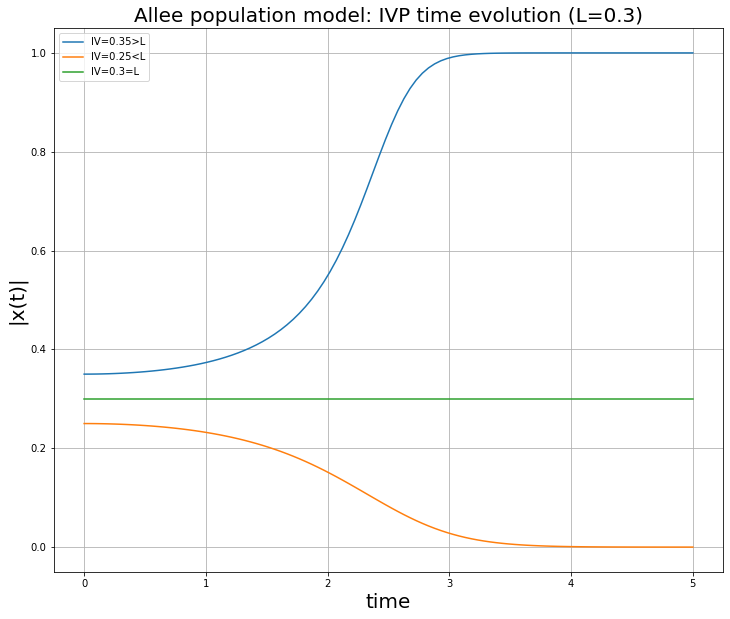

In [10]:
#plots

plt.figure(figsize=(12,10))
plt.plot(t, P1, label='IV=0.35>L')
plt.plot(t, P2, label='IV=0.25<L')
plt.plot(t, P3, label='IV=0.3=L')
plt.xlabel('time',fontsize=20)
plt.ylabel('|x(t)|',fontsize=20)
plt.title('Allee population model: IVP time evolution (L=0.3)',fontsize=20)
plt.legend(loc=0)
plt.grid()

In [12]:
xs = np.linspace(-0.1,1.1,100)
ys=[]
for i in xs:
    ys.append(allee(i,r,L))

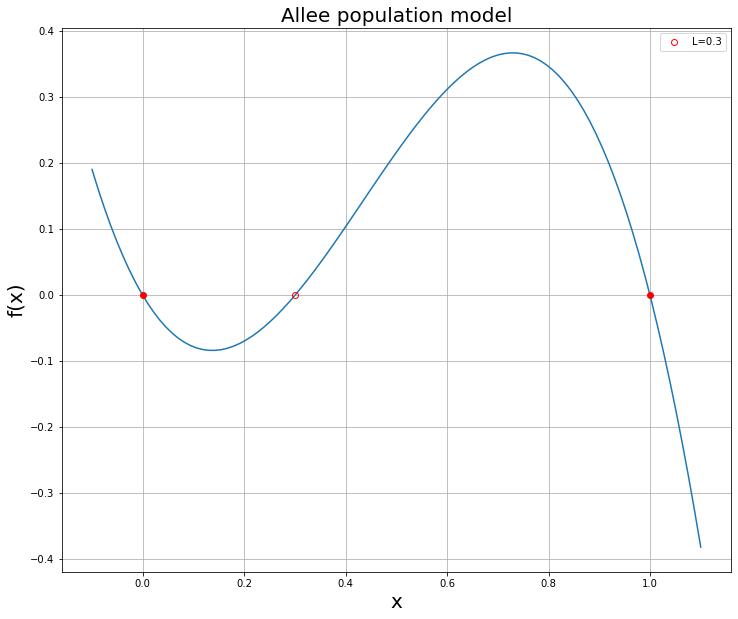

In [13]:
#plots

plt.figure(figsize=(12,10))
plt.plot(xs, ys)
plt.plot(0,0,'ro')
plt.plot(1,0,'ro')
plt.plot(0.3,0,'ro',fillstyle='none', label="L=0.3")
plt.xlabel('x',fontsize=20)
plt.ylabel('f(x)',fontsize=20) # where f(x) is the allee function
plt.title('Allee population model',fontsize=20)
plt.legend(loc=0)
plt.grid()

# Local Indicators

### Characteristic return time

In [16]:
x=sym.Symbol('x')
r=sym.Symbol('r')
L=sym.Symbol('L')
f=allee(x,r,L)
f_p=f.diff(x)
f=sym.lambdify([x,r,L], f)
f_p=sym.lambdify([x,r,L], f_p)


def Tr(x,r,L): 
    return f_p(x,r,L)

#at attractor x=1
print("Characteristic return time of Species 1 =",Tr(1,r1,L1),"\n")
print("Characteristic return time of Species 2 =",Tr(1,r2,L2),"\n")
print("Characteristic return time of Species 3 =",Tr(1,r3,L3),"\n")
print("Characteristic return time of Species 4 =",Tr(1,r4,L4),"\n")
print("Characteristic return time of Species 5 =",Tr(1,r5,L5),"\n")

rs=np.array([r1,r2,r3,r4,r5])
Ls=np.array([L1,L2,L3,L4,L5])
Ts=np.array([Tr(1,r1,L1),Tr(1,r2,L2),Tr(1,r3,L3),Tr(1,r4,L4),Tr(1,r5,L5)])
species=['1','2','3','4','5']

plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(rs,Ls,c=Ts,s=(1/np.abs(np.log(Ts)))*6000,alpha=0.5)
for i, txt in enumerate(species):
    ax.annotate(txt, (rs[i], Ls[i]), size=20, color='0.1')
#plt.scatter(r2,L2,c=Tr(1,r2,L2),s=Tr(1,r2,L2)*1000,alpha=0.5,label="Species 2")
#plt.scatter(r3,L3,c=Tr(1,r3,L3),s=Tr(1,r3,L3)*1000,alpha=0.5,label="Species 3")
#plt.scatter(r4,L4,c=Tr(1,r4,L4),s=Tr(1,r4,L4)*1000,alpha=0.5,label="Species 4")
#plt.scatter(r5,L5,c=Tr(1,r5,L5),s=Tr(1,r5,L5)*1000,alpha=0.5,label="Species 5")
plt.xlabel('r',fontsize=15)
plt.ylabel('L',fontsize=15)
plt.title('Characteristic return time to attractor x=1',fontsize=20)
plt.colorbar()
plt.show()


Characteristic return time of Species 1 = -2.0 

Characteristic return time of Species 2 = -3.0333333333333337 

Characteristic return time of Species 3 = -3.75 

Characteristic return time of Species 4 = -3.333333333333334 

Characteristic return time of Species 5 = -4.2857142857142865 



C:\Users\Assain\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log


<Figure size 864x720 with 0 Axes>

### Amplification envelope

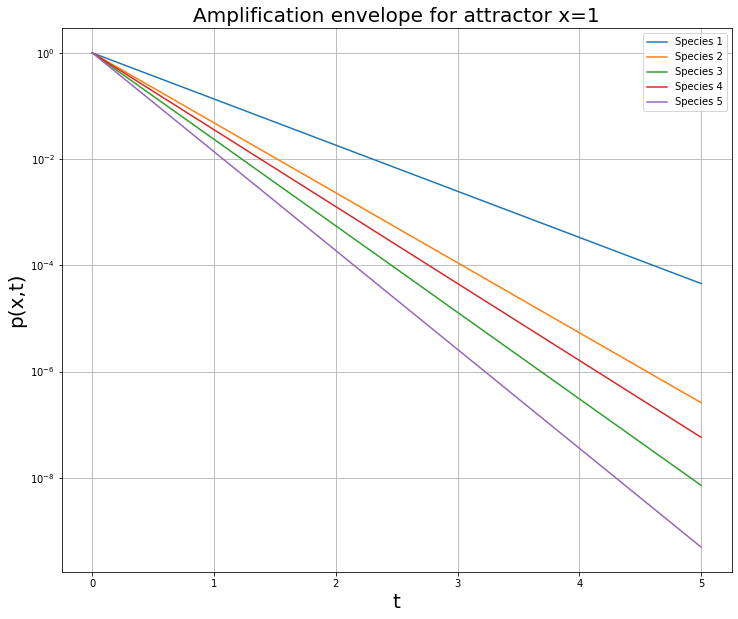

In [17]:
def p(x,r,L,t):
    return np.exp(f_p(x,r,L)*t)

ps1=[]
ps2=[]
ps3=[]
ps4=[]
ps5=[]
for i in t:
    ps1.append(p(1,r1,L1,i))
    ps2.append(p(1,r2,L2,i))
    ps3.append(p(1,r3,L3,i))
    ps4.append(p(1,r4,L4,i))
    ps5.append(p(1,r5,L5,i))

plt.figure(figsize=(12,10))
plt.plot(t, ps1, label='Species 1')
plt.plot(t, ps2, label='Species 2')
plt.plot(t, ps3, label='Species 3')
plt.plot(t, ps4, label='Species 4')
plt.plot(t, ps5, label='Species 5')
plt.xlabel('t',fontsize=20)
plt.ylabel('p(x,t)',fontsize=20)
plt.title('Amplification envelope for attractor x=1',fontsize=20)
plt.legend(loc='best')
ax = plt.gca()
ax.set_yscale('log')
plt.grid()

### Reactivity

Species 1 :
Reactivity = -2.0 (nonreactive) 

Species 2 :
Reactivity = -3.0333333333333337 (nonreactive) 

Species 3 :
Reactivity = -3.75 (nonreactive) 

Species 4 :
Reactivity = -3.333333333333334 (nonreactive) 

Species 5 :
Reactivity = -4.2857142857142865 (nonreactive) 

Reactivity = -2.0 (nonreactive) 

Reactivity = -3.0333333333333337 (nonreactive) 

Reactivity = -3.75 (nonreactive) 

Reactivity = -3.333333333333334 (nonreactive) 

Reactivity = -4.2857142857142865 (nonreactive) 



<Figure size 864x720 with 0 Axes>

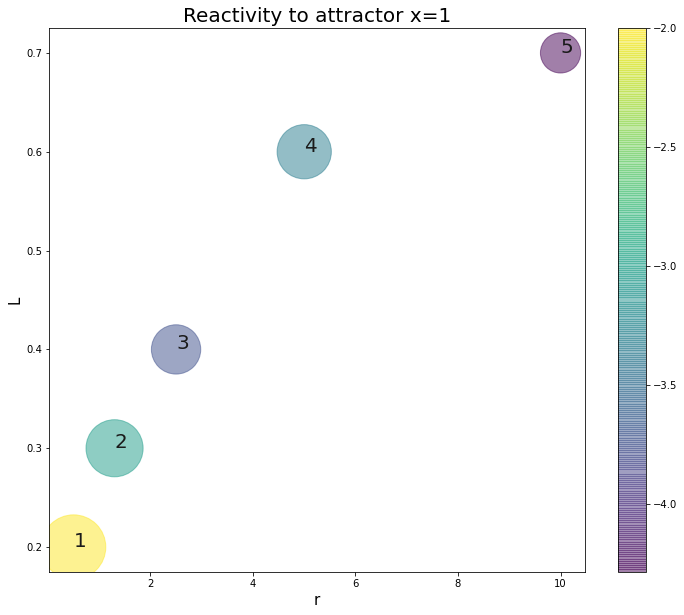

In [80]:
def R0(x,r,L):
    R0= f_p(x,r,L)
    if R0 < 0 :
        print("Reactivity =",R0,"(nonreactive)","\n")
    else :
        print("Reactivity =",R0,"(reactive)","\n")
    return R0
        
        
print("Species 1 :")
R0(1,r1,L1)

print("Species 2 :")
R0(1,r2,L2)

print("Species 3 :")
R0(1,r3,L3)

print("Species 4 :")
R0(1,r4,L4)

print("Species 5 :")
R0(1,r5,L5)


rs=np.array([r1,r2,r3,r4,r5])
Ls=np.array([L1,L2,L3,L4,L5])
Rs=np.array([R0(1,r1,L1),R0(1,r2,L2),R0(1,r3,L3),R0(1,r4,L4),R0(1,r5,L5)])
species=['1','2','3','4','5']

plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(rs,Ls,c=Rs,s=np.log((Rs+6))*3000,alpha=0.5)
for i, txt in enumerate(species):
    ax.annotate(txt, (rs[i], Ls[i]), size=20, color='0.1')
plt.xlabel('r',fontsize=15)
plt.ylabel('L',fontsize=15)
plt.title('Reactivity to attractor x=1',fontsize=20)
plt.colorbar()
plt.show()


# Basin Shape Indicators

#### Distance to threshold

Species 1 :
Distance to threshold = 0.8 

Species 2 :
Distance to threshold = 0.7 

Species 3 :
Distance to threshold = 0.6 

Species 4 :
Distance to threshold = 0.4 

Species 5 :
Distance to threshold = 0.30000000000000004 

Distance to threshold = 0.8 

Distance to threshold = 0.7 

Distance to threshold = 0.6 

Distance to threshold = 0.4 

Distance to threshold = 0.30000000000000004 



<Figure size 864x720 with 0 Axes>

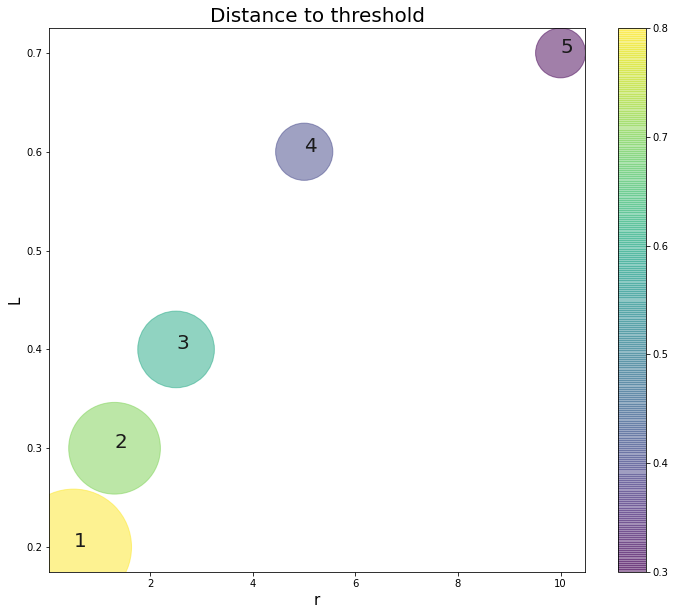

In [87]:
def DT(x,r,L):
    DT=1-L
    print("Distance to threshold =",DT,"\n")
    return DT
    
print("Species 1 :")
DT(1,r1,L1)

print("Species 2 :")
DT(1,r2,L2)

print("Species 3 :")
DT(1,r3,L3)

print("Species 4 :")
DT(1,r4,L4)

print("Species 5 :")
DT(1,r5,L5)


rs=np.array([r1,r2,r3,r4,r5])
Ls=np.array([L1,L2,L3,L4,L5])
Ds=np.array([DT(1,r1,L1),DT(1,r2,L2),DT(1,r3,L3),DT(1,r4,L4),DT(1,r5,L5)])
species=['1','2','3','4','5']

plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(rs,Ls,c=Ds,s=np.abs((1/np.log(Ds)))*3000,alpha=0.5)
for i, txt in enumerate(species):
    ax.annotate(txt, (rs[i], Ls[i]), size=20, color='0.1')
plt.xlabel('r',fontsize=15)
plt.ylabel('L',fontsize=15)
plt.title('Distance to threshold',fontsize=20)
plt.colorbar()
plt.show()


### Precariousness

Basin of attraction of attractor $x=1$ is $ \mathcal{B}(\mathcal{A}) = (L,\infty)$ (unbounded)

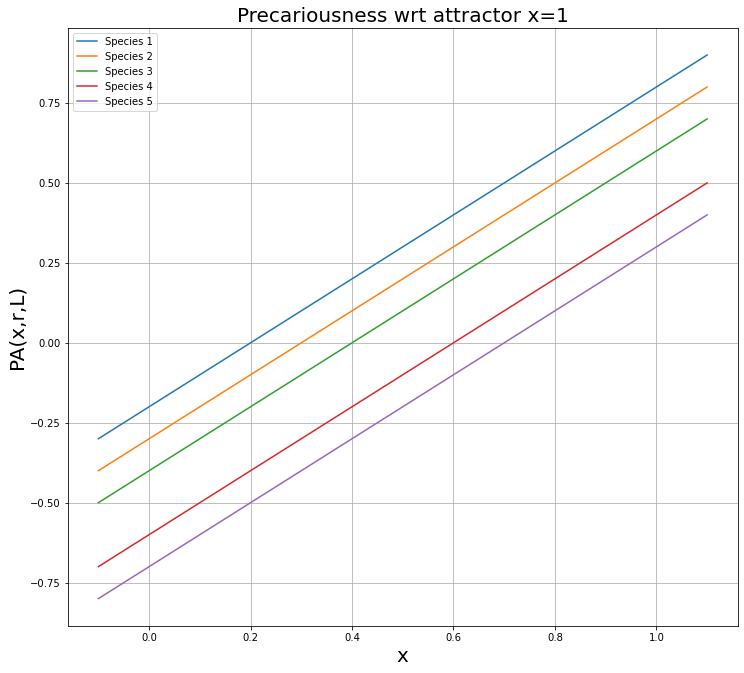

In [24]:

def PA(x,r,L):
    PA=x-L
    return PA


PA1=[]
PA2=[]
PA3=[]
PA4=[]
PA5=[]

for i in xs:
    PA1.append(PA(i,r1,L1))
    PA2.append(PA(i,r2,L2))
    PA3.append(PA(i,r3,L3))
    PA4.append(PA(i,r4,L4))
    PA5.append(PA(i,r5,L5))
    
plt.figure(figsize=(12,11))
plt.plot(xs, PA1, label='Species 1')
plt.plot(xs, PA2, label='Species 2')
plt.plot(xs, PA3, label='Species 3')
plt.plot(xs, PA4, label='Species 4')
plt.plot(xs, PA5, label='Species 5')
plt.xlabel('x',fontsize=20)
plt.ylabel('PA(x,r,L)',fontsize=20)
plt.title('Precariousness wrt attractor x=1', fontsize=20)
plt.legend(loc='best')
plt.grid()

### Latitude in volume $L_v$

Lebesgue measure of open set $ S = \sum_{k} (a_k,b_k) $ is $ \mu_{L}(S) = \sum_{k} (b_k-a_k) $

Lattitude in volume of attractor $\mathcal{A}$ wrt region of interest $C$ is :
$$ L_{v}(\mathcal{A},C) = \frac{\mu(\mathcal{B}(\mathcal{A}) \cap C)}{\mu(C)} $$

Consider $C = (0,1)$. We know $\mathcal{B}(\mathcal{A}) = (L,\infty)$

Therefore $ L_v = \frac{ \mu((L,1)) }{\mu((0,1))} = 1-L $

#### Basin stability

Take $\rho(x)$ as uniform density $\mathcal{}U_{(0,1)} $

Basin Stability of attractor $\mathcal{A}$ wrt $\rho$ is given as :
$$ \mathcal{S}_{\mathcal{B}(\mathcal{A})} \; (\rho) = \int_{\mathbb{R}^N} \; \chi_{\mathcal{B}(\mathcal{A})} \; (x) \rho(x)dx $$

In this case, $ S = \int_{R} \chi_{(L,\infty)} \; (x) 1_{(0,1)} dx  = \int_{x=L}^{1}dx = 1-L $ 


